<a href="https://colab.research.google.com/github/tinayo2/dc-mini-project-sg-1/blob/main/task_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from io import open
import glob
import os

def findFiles(path): return glob.glob(path)  #The findFiles function uses glob.glob to find files matching a specified pattern.

print(findFiles('data.zip'))
!unzip data.zip

import unicodedata
import string

all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

def unicodeToAscii(s):   #The unicodeToAscii function converts Unicode strings to ASCII, removing diacritics and non-ASCII characters.
    return ''.join(
        c for c in unicodedata.normalize('NFD', s) #Normalization form decomposition
        if unicodedata.category(c) != 'Mn' #The list comprehension filters out characters that are diacritical marks
        and c in all_letters
    )

print(unicodeToAscii('Ślusàrski'))

# Build the category_lines dictionary, a list of names per language
category_lines = {}
all_categories = []

# Read a file and split into lines
def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n') #The file is opened with UTF-8 encoding, read into a single string, stripped of leading and trailing whitespace, and split into lines.
    return [unicodeToAscii(line) for line in lines]  #returns the lines in ASCII format.

for filename in findFiles('data/names/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

n_categories = len(all_categories)


['data.zip']
Archive:  data.zip
   creating: data/
  inflating: data/eng-fra.txt        
   creating: data/names/
  inflating: data/names/Arabic.txt   
  inflating: data/names/Chinese.txt  
  inflating: data/names/Czech.txt    
  inflating: data/names/Dutch.txt    
  inflating: data/names/English.txt  
  inflating: data/names/French.txt   
  inflating: data/names/German.txt   
  inflating: data/names/Greek.txt    
  inflating: data/names/Irish.txt    
  inflating: data/names/Italian.txt  
  inflating: data/names/Japanese.txt  
  inflating: data/names/Korean.txt   
  inflating: data/names/Polish.txt   
  inflating: data/names/Portuguese.txt  
  inflating: data/names/Russian.txt  
  inflating: data/names/Scottish.txt  
  inflating: data/names/Spanish.txt  
  inflating: data/names/Vietnamese.txt  
Slusarski


In [2]:
all_categories

['English',
 'German',
 'Irish',
 'Arabic',
 'Vietnamese',
 'Russian',
 'Japanese',
 'Spanish',
 'French',
 'Italian',
 'Scottish',
 'Greek',
 'Dutch',
 'Czech',
 'Chinese',
 'Polish',
 'Portuguese',
 'Korean']

In [3]:
category_lines

{'English': ['Abbas',
  'Abbey',
  'Abbott',
  'Abdi',
  'Abel',
  'Abraham',
  'Abrahams',
  'Abrams',
  'Ackary',
  'Ackroyd',
  'Acton',
  'Adair',
  'Adam',
  'Adams',
  'Adamson',
  'Adanet',
  'Addams',
  'Adderley',
  'Addinall',
  'Addis',
  'Addison',
  'Addley',
  'Aderson',
  'Adey',
  'Adkins',
  'Adlam',
  'Adler',
  'Adrol',
  'Adsett',
  'Agar',
  'Ahern',
  'Aherne',
  'Ahmad',
  'Ahmed',
  'Aikman',
  'Ainley',
  'Ainsworth',
  'Aird',
  'Airey',
  'Aitchison',
  'Aitken',
  'Akhtar',
  'Akram',
  'Alam',
  'Alanson',
  'Alber',
  'Albert',
  'Albrighton',
  'Albutt',
  'Alcock',
  'Alden',
  'Alder',
  'Aldersley',
  'Alderson',
  'Aldred',
  'Aldren',
  'Aldridge',
  'Aldworth',
  'Alesbury',
  'Alexandar',
  'Alexander',
  'Alexnader',
  'Alford',
  'Algar',
  'Ali',
  'Alker',
  'Alladee',
  'Allam',
  'Allan',
  'Allard',
  'Allaway',
  'Allcock',
  'Allcott',
  'Alldridge',
  'Alldritt',
  'Allen',
  'Allgood',
  'Allington',
  'Alliott',
  'Allison',
  'Allkins'

In [4]:
print(category_lines['Italian'][:5])


['Abandonato', 'Abatangelo', 'Abatantuono', 'Abate', 'Abategiovanni']


In [5]:
import torch

# Find letter index from all_letters, e.g. "a" = 0
def letterToIndex(letter):
    return all_letters.find(letter)

# Just for demonstration, turn a letter into a <1 x n_letters> Tensor
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

# Turn a line into a <line_length x 1 x n_letters>,
# or an array of one-hot letter vectors
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

print(letterToTensor('J'))
print(lineToTensor('Jones'))
print(lineToTensor('Jones').size())

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0.

In [19]:
import torch.nn as nn
import torch.nn.functional as F

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.input_size = input_size
        self.output_size = output_size
        self.W_ih = nn.Parameter(torch.randn(self.hidden_size, self.input_size))
        self.W_hh = nn.Parameter(torch.randn(self.hidden_size, self.hidden_size))
        self.W_ho = nn.Parameter(torch.randn(self.output_size, self.hidden_size))
        self.b_h = nn.Parameter(torch.zeros(self.hidden_size))
        self.b_o = nn.Parameter(torch.zeros(self.output_size))

    def forward(self, input, hidden, time_steps=10):
        # Ensure input and hidden are tensors
        if not torch.is_tensor(input) or not torch.is_tensor(hidden):
            raise ValueError("Input and hidden must be tensors")

        # Adjust shapes for matrix multiplication
        input = input.view(-1, self.W_ih.size(1))  # Ensure input is (hidden_size, input_size)
        hidden = hidden.view(-1, self.W_hh.size(1))  # Ensure hidden is (hidden_size, hidden_size)
        hidden = torch.tanh(input @ self.W_ih.t() + hidden @ self.W_hh.t() + self.b_h)
        output = F.log_softmax(hidden @ self.W_ho.t() + self.b_o, dim=1)
        return output, hidden


    def init_hidden(self, batch_size=1):
        return torch.zeros(batch_size, self.hidden_size)

    def backward(self, W_hh, W_ih, W_ho, b, x, h, y_i, y_ti):

        h_t_plus_1 = torch.zeros(hidden_size)
        if a>=0:
           L=torch.zeros(hidden_size)
           for k in range(t+1):#initialise loss to zero then continue
               L=((y_i-y_ti)**2)/n
               dL_wih=((y_i-y_ti)*(W_ho)*(x))/n
               dL_who=((y_i-y_ti)*(a))/n
               dL_whh=((y_i-y_ti)*(W_ho)*((k+1)(W_hh**k)*h[t-k]+k*W_ih(*(W_hh**(k-1))*x[t-k])+k*((W_hh**(k-1))*b[t-k])))/n
               #similar for bias
        else:
           L=torch.zeros(hidden_size)
           for k in range(t+1):#initialise loss to zero then continue
               L=((y_i-y_ti)**2)/n
               dL_wih=(0.01*(y_i-y_ti)*(W_ho)*(x))/n
               dL_who=(0.01*(y_i-y_ti)*(a))/n
               dL_whh=(0.01*(y_i-y_ti)*(W_ho)*((k+1)(W_hh**k)*h[t-k]+k*W_ih(*(W_hh**(k-1))*x[t-k])+k*((W_hh**(k-1))*b[t-k])))/n

In [20]:
input_size = n_letters  # Define input_size as the number of letters in the alphabet
hidden_size = 128  # Define hidden_size, you can choose a suitable value
output_size = n_categories  # Define output_size as the number of categories

input = letterToTensor('A')
hidden = torch.zeros(1, hidden_size)  # Now hidden_size is defined

# Create an instance of the RNN class
rnn = RNN(input_size, hidden_size, output_size) # Pass the chosen values to the RNN constructor

output, next_hidden = rnn(input, hidden, output_size)  # Pass the input and initial hidden state to the RNN
print(output)  # Print the output of the RNN

tensor([[-14.1051,  -5.7475,  -5.0107,  -9.8485, -11.5736,  -1.3381,  -0.3307,
          -5.7406, -14.7957,  -8.1882, -13.1780, -14.8096, -18.1824, -13.7933,
          -5.1896, -17.4250, -13.4803,  -8.3261]],
       grad_fn=<LogSoftmaxBackward0>)


In [21]:
input = letterToTensor('A')
hidden = torch.zeros(1, hidden_size)  # Now hidden_size is defined

# Create an instance of the RNN class
rnn = RNN(input_size, hidden_size, output_size)

output, next_hidden = rnn(input, hidden, output_size)  # Pass the input and initial hidden state to the RNN
print(output)  # Print the output of the RNN

tensor([[-16.1477, -19.8198,  -7.5125, -25.0897, -19.3228, -19.2236, -15.6043,
          -0.0655,  -8.2541,  -5.4511, -10.8175,  -9.8737,  -6.4017,  -9.6573,
          -9.0766, -14.8435, -14.1465,  -2.8749]],
       grad_fn=<LogSoftmaxBackward0>)


In [22]:
input = lineToTensor('Albert')
input.squeeze(1)
hidden = torch.zeros(1, hidden_size)

output, next_hidden = rnn(input[0], hidden, output_size)
print(output)

tensor([[-16.1477, -19.8198,  -7.5125, -25.0897, -19.3228, -19.2236, -15.6043,
          -0.0655,  -8.2541,  -5.4511, -10.8175,  -9.8737,  -6.4017,  -9.6573,
          -9.0766, -14.8435, -14.1465,  -2.8749]],
       grad_fn=<LogSoftmaxBackward0>)


In [23]:
def categoryFromOutput(output):
    # Get the top category index from the model's output
    top_n, top_i = output.topk(1)  # Returns the highest value and its index
    category_i = top_i[0].item()   # Convert the top index tensor to a Python integer
    return all_categories[category_i], category_i  # Return the category name and its index

# Example usage: print the category name and index for the given output
print(categoryFromOutput(output))


('Spanish', 7)


In [24]:
import random

# Function to choose a random element from a list ``l``
def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

# Function to create a random training example
def randomTrainingExample():
    # Choose a random category (language)
    category = randomChoice(all_categories)

    # Choose a random line (name) from the chosen category
    line = randomChoice(category_lines[category])

    # Create a tensor for the category (as an index in all_categories)
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)

    # Convert the line to a tensor using the lineToTensor function
    line_tensor = lineToTensor(line)

    # Return the category, line, and their respective tensors
    return category, line, category_tensor, line_tensor

# Loop to print 10 random training examples
for i in range(10):
    # Get a random training example
    category, line, category_tensor, line_tensor = randomTrainingExample()

    # Print the category and line
    print('category =', category, '/ line =', line)


category = French / line = Masson
category = Chinese / line = Sui
category = Portuguese / line = Mata
category = Greek / line = Adamidis
category = Dutch / line = Lyon
category = Italian / line = Amatore
category = German / line = Auer
category = Dutch / line = Penders
category = Italian / line = Basurto
category = Vietnamese / line = Huynh


In [25]:
criterion = nn.NLLLoss()

In [26]:
learning_rate = 0.005 # If you set this too high, it might explode. If too low, it might not learn

def train(category_tensor, line_tensor):
    hidden = rnn.init_hidden()

    rnn.zero_grad()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()

    # Add parameters' gradients to their values, multiplied by learning rate (this is done instead of optimizer.step())
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item()

In [27]:
import time
import math

# Number of iterations to train
n_iters = 100000

# Print progress every ``print_every`` iterations
print_every = 5000

# Record loss for plotting every ``plot_every`` iterations
plot_every = 1000

# Keep track of losses for plotting
current_loss = 0
all_losses = []

# Function to calculate the elapsed time since ``since`` in minutes and seconds
def timeSince(since):
    now = time.time()  # Current time
    s = now - since  # Elapsed time in seconds
    m = math.floor(s / 60)  # Convert seconds to minutes
    s -= m * 60  # Remaining seconds after converting to minutes
    return '%dm %ds' % (m, s)  # Format as "Xm Ys"

start = time.time()  # Record the start time

for iter in range(1, n_iters + 1):
    # Get a random training example: category, line, and their tensor representations
    category, line, category_tensor, line_tensor = randomTrainingExample()

    # Train the model on the example and get the output and loss
    output, loss = train(category_tensor, line_tensor)

    current_loss += loss  # Accumulate the loss

    # Print ``iter`` number, loss, name and guess every ``print_every`` iterations
    if iter % print_every == 0:
        # Get the model's guess and the index of the guessed category
        guess, guess_i = categoryFromOutput(output)

        # Check if the guess is correct
        correct = '✓' if guess == category else '✗ (%s)' % category

        # Print iteration number, progress, elapsed time, loss, input line, guessed category, and correctness
        print('%d %d%% (%s) %.4f %s / %s %s' % (
            iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # Add current loss average to the list of losses every ``plot_every`` iterations
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)  # Average loss over the last ``plot_every`` iterations
        current_loss = 0  # Reset current loss


5000 5% (0m 11s) 3.2918 Glukharev / Arabic ✗ (Russian)
10000 10% (0m 23s) 1.9817 Dyachkovsky / French ✗ (Russian)
15000 15% (0m 35s) 2.5210 Kunikida / Dutch ✗ (Japanese)
20000 20% (0m 46s) 4.1253 Luong / Czech ✗ (Vietnamese)
25000 25% (0m 58s) 2.6709 Vipond / Arabic ✗ (French)
30000 30% (1m 9s) 3.1957 Marchuk / Irish ✗ (Russian)
35000 35% (1m 20s) 0.8178 Zang / Chinese ✓
40000 40% (1m 31s) 1.9655 Pinheiro / Greek ✗ (Portuguese)
45000 45% (1m 42s) 0.5923 Tze / Chinese ✓
50000 50% (1m 55s) 0.7646 Moy / Chinese ✓
55000 55% (2m 7s) 2.6710 Vinci / Arabic ✗ (Italian)
60000 60% (2m 18s) 1.4416 Rorris / Greek ✓
65000 65% (2m 29s) 3.0323 Cunningham / Irish ✗ (Scottish)
70000 70% (2m 41s) 2.1392 Morita / Spanish ✗ (Japanese)
75000 75% (2m 51s) 2.1656 Snijders / English ✗ (Dutch)
80000 80% (3m 2s) 2.5080 Vaskovtsev / French ✗ (Russian)
85000 85% (3m 14s) 2.8862 Qiao / Korean ✗ (Chinese)
90000 90% (3m 25s) 2.6858 Serafin / French ✗ (Polish)
95000 95% (3m 36s) 2.2480 Alvarado / Greek ✗ (Spanish)
10

<ipython-input-28-8cd767298307>:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + all_categories, rotation=90)  # Set x-axis labels with rotation
<ipython-input-28-8cd767298307>:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + all_categories)  # Set y-axis labels


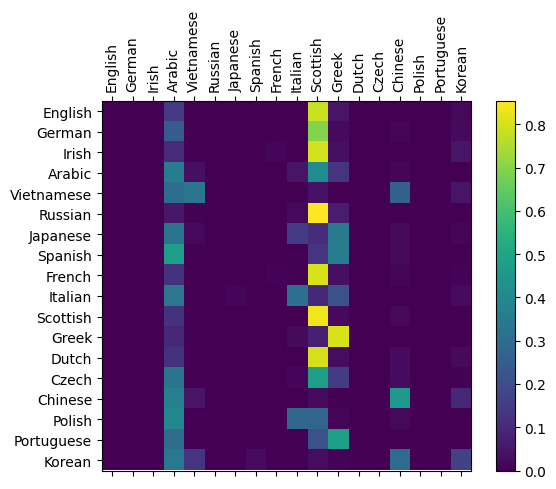

In [28]:
# Keep track of correct guesses in a confusion matrix
confusion = torch.zeros(n_categories, n_categories)  # Initialize an empty confusion matrix
n_confusion = 10000  # Number of examples to evaluate for the confusion matrix

import matplotlib.pyplot as plt  # Importing matplotlib for plotting
import matplotlib.ticker as ticker  # Importing ticker for customizing ticks

# Just return an output given a line
def evaluate(line_tensor):
    hidden = rnn.init_hidden()  # Initialize the hidden state

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)  # Pass each character in the line through the RNN

    return output  # Return the final output of the RNN

# Go through a bunch of examples and record which are correctly guessed
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()  # Get a random training example
    output = evaluate(line_tensor)  # Evaluate the line tensor
    guess, guess_i = categoryFromOutput(output)  # Get the guessed category and its index
    category_i = all_categories.index(category)  # Get the true category index
    confusion[category_i][guess_i] += 1  # Increment the corresponding cell in the confusion matrix

# Normalize by dividing every row by its sum
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()  # Normalize each row

# Set up plot
fig = plt.figure()  # Create a new figure
ax = fig.add_subplot(111)  # Add a subplot to the figure
cax = ax.matshow(confusion.numpy())  # Display the confusion matrix as an image
fig.colorbar(cax)  # Add a color bar to the figure

# Set up axes
ax.set_xticklabels([''] + all_categories, rotation=90)  # Set x-axis labels with rotation
ax.set_yticklabels([''] + all_categories)  # Set y-axis labels

# Force label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))  # Set x-axis major ticks
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))  # Set y-axis major ticks
plt.show()  # Show the plot

In [29]:
def predict(input_line, n_predictions=3):
    print('\n> %s' % input_line)
    with torch.no_grad():
        output = evaluate(lineToTensor(input_line))

        # Get top N categories
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []

        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            print('(%.2f) %s' % (value, all_categories[category_index]))
            predictions.append([value, all_categories[category_index]])


In [30]:
predict('Dovesky')
predict('Jackson')
predict('Satoshi')


> Dovesky
(-1.25) Scottish
(-1.57) Arabic
(-1.67) Irish

> Jackson
(-1.11) Scottish
(-1.64) Irish
(-1.88) Arabic

> Satoshi
(-1.30) Italian
(-1.43) Japanese
(-1.72) Arabic
